<a href="https://colab.research.google.com/github/DavidStrickland19/Credit-Card-Approval-Predictions/blob/main/Credit_Card_Approval_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project looks to make credit card approval predictions using a logistic regression model on a Credit Card Approval dataset from the UCI Machine Learning Repository.**

In [36]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv('/content/drive/MyDrive/D_Science_Projects/Credit Card Approvals/CC_datasets/cc_approvals.data' , header= None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**Next, we will observe all of the applicatoins. This data set does not reveal actual applicant information for privacy rights. But it is know from the source that categories such as gender, age, Debt, martial status, customer's bank, education Level, ethnicity, years employed, prior defaults, employment status, credit score, drivers liscence information, citizenship, zip code, and income all effect the approval status of a credit card.**

In [37]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info(())
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(17) 

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


**Next, we will split our data into training and testing sets.**

In [38]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop([11, 13], axis=1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

**Here, we will be replacing missing values in our dataset.**

In [91]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace(to_replace='?', value= np.NaN)
cc_apps_test = cc_apps_test.replace(to_replace='?', value= np.NaN)  




**Now, we will take the missing values and replace them with the average value of the respective column. Afterwards we want to observe how many NaN's are left.**

In [41]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


**There are still some columns that have non-numeric values. So replacing NaN's with the mean value of those remaining columns will not work. So a loop will be created to impute over these missing values with the most common value from their respective column.**

In [42]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_test[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())  

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


**Although we do not have any missing values, we still non-numeric values. So we will get rid of these by converting them into numeric values. We will also be scaling our feature values into a uniform range so that the data can be used in our model.**

In [47]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)





**We will be rescaling the Credit Score column. The Credit Score reflects someones credit worthiness. This scale ranges from 0 to 1. Therefore we will re-scale all values in this column between 0 and 1 for our data being used in the model.**

In [92]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:, :-1].values, cc_apps_train.iloc[:,[-1]].values
X_test, y_test = cc_apps_test.iloc[:,:-1].values, cc_apps_test.iloc[:,[-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)


**Whether or not someone is approved is a classification task. Therefore we will implement a logistic regression model here. The data we have shows that only about 44.5% of applicants were approved. So we will use this as a general marker when considering the results of our model. It is good to understand what model you should end up picking to create more predictions from in the future. Something worthy of asking is if the features that affect the credit card approval decision process are correlated with each other or not. For the sake of this model, we will assume these features are related to the credit card approval, as this analysis does not look to deep dive.**

In [74]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()


# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Next, we will create our confusion matrix to show our predicted values. We will also show the accuracy of these predicted values.**

Accuracy of logistic regression classifier:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


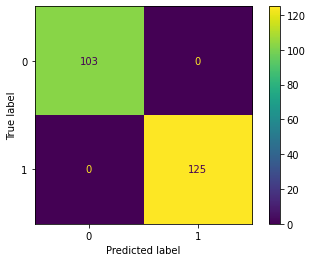

In [86]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test,y_pred) 


#Plot the confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, rescaledX_test, y_test)  
plt.show()





**We can clearly see that the model did very well, 100% accurate. We see that there were 103 denied applications and 125 approved applications. Although our model predicted with 100% accuracy, we can still improve the model. This will be done using a grid search of the models parameters, in order to better the models predictions. The grid search will look to improve the tol and maxiter hyperparameters.**

In [73]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [.01, .001, .0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol= tol, max_iter= max_iter)

**Lastly, we will again use the grid search on the logistic regression model to find the best model. We previously defined our hyperparamters. We will now see which of those performed the best. So we will do two things - First, we will instantiate grid search to our logistic regression model. Second, we will perform a cross validation of five folds.**

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid= param_grid, cv= 5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_ 
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test)) 

We can see that our best result is -

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01} 